# Install Libraries & Mount Drive

In [ ]:
!pip install iterative-stratification


In [ ]:
!pip install seaborn matplotlib opencv-python tensorflow numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#	Download & Extract Dataset (Hugging Face)

In [ ]:
# ‚úÖ FULL DATASET PREPROCESSING PIPELINE (Kaggle + HuggingFace Compatible)

import os
import zipfile
import requests
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import MultiLabelBinarizer
import glob

In [ ]:
# 1. Download the dataset ZIP from HuggingFace
url = "https://huggingface.co/datasets/Sugayathri/crx8selected/resolve/main/archive.zip"
zip_path = "/content/archive.zip"
extract_path = "/content/crx8"

if not os.path.exists(zip_path):
    print("üì• Downloading dataset from HuggingFace...")
    r = requests.get(url, stream=True)
    with open(zip_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
else:
  print("No Dataset Found")

üì• Downloading dataset from HuggingFace...


In [ ]:
# 2. Extract ZIP
if not os.path.exists(extract_path):
    print("üìÇ Extracting dataset...")
    with zipfile.ZipFile("/content/archive.zip", 'r') as zip_ref:
        zip_ref.extractall(extract_path)

üìÇ Extracting dataset...


# Loading CSV Files and Initial Data Inspection

In [ ]:
data_df = pd.read_csv("/content/crx8/Data_Entry_2017.csv")
bbox_df = pd.read_csv("/content/crx8/BBox_List_2017.csv")

In [ ]:
data_df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                        0.143  0.143  
2                        0.168  0.168  
3                        0.171  0.171  
4                        0.168  0.168

In [ ]:
bbox_df.head()

Image Index Finding Label     Bbox [x           y           w  \
0  00013118_008.png   Atelectasis  225.084746  547.019217   86.779661   
1  00014716_007.png   Atelectasis  686.101695  131.543498  185.491525   
2  00029817_009.png   Atelectasis  221.830508  317.053115  155.118644   
3  00014687_001.png   Atelectasis  726.237288  494.951420  141.016949   
4  00017877_001.png   Atelectasis  660.067797  569.780787  200.677966   

           h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0   79.186441         NaN         NaN         NaN  
1  313.491525         NaN         NaN         NaN  
2  216.949153         NaN         NaN         NaN  
3   55.322034         NaN         NaN         NaN  
4   78.101695         NaN         NaN         NaN

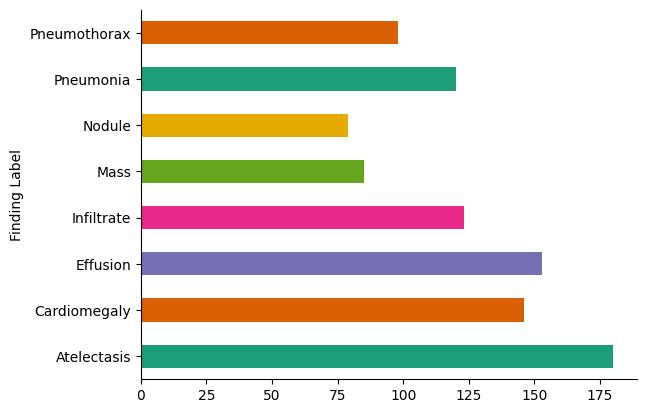

In [ ]:
# @title Finding Label

from matplotlib import pyplot as plt
import seaborn as sns
bbox_df.groupby('Finding Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

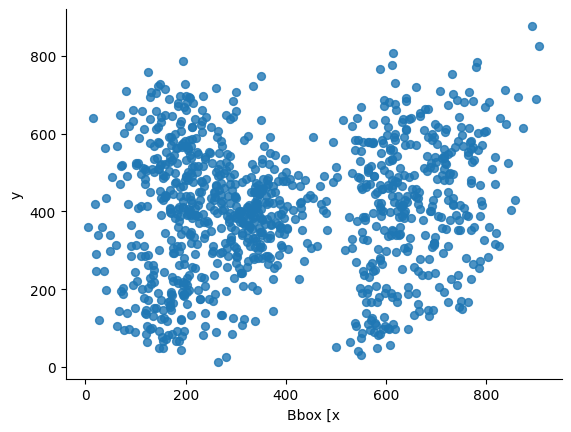

In [ ]:
# @title Bbox [x vs y

from matplotlib import pyplot as plt
bbox_df.plot(kind='scatter', x='Bbox [x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def load_txt(file_path):
    try:
        with open(file_path, "r") as f:
            lines = [line.strip() for line in f.readlines()]
        print(f"Loaded {file_path} ({len(lines)} entries)")
        return lines[:10]  # Return first 10 entries
    except FileNotFoundError:
        print(f"‚ùå {file_path} not found.")
        return None
train_list = load_txt("/content/crx8/train_val_list.txt")
test_list = load_txt("/content/crx8/test_list.txt")

Loaded /content/crx8/train_val_list.txt (86524 entries)
Loaded /content/crx8/test_list.txt (25596 entries)


In [ ]:
# Display first 10 entries
if train_list: print("\n First 10 Train Entries:\n", "\n".join(train_list))
if test_list: print("\nFirst 10 Test Entries:\n", "\n".join(test_list))



 First 10 Train Entries:
 00000001_000.png
00000001_001.png
00000001_002.png
00000002_000.png
00000004_000.png
00000005_000.png
00000005_001.png
00000005_002.png
00000005_003.png
00000005_004.png

First 10 Test Entries:
 00000003_000.png
00000003_001.png
00000003_002.png
00000003_003.png
00000003_004.png
00000003_005.png
00000003_006.png
00000003_007.png
00000013_000.png
00000013_001.png


#	Exploratory Data Analysis (EDA)

In [ ]:
import os
# Automatically find all PNG images inside subfolders
image_files = glob.glob("/content/crx8/images/**/*.png", recursive=True)


# Extract only filenames (to match the CSV file)
available_images = set([os.path.basename(f) for f in image_files])

# Update dataset to check which images exist
data_df["Exists"] = data_df["Image Index"].isin(available_images)

# ‚úÖ Print updated results
print("\n‚úÖ Image Availability Check:")
print(data_df["Exists"].value_counts())



‚úÖ Image Availability Check:
Exists
True    112120
Name: count, dtype: int64


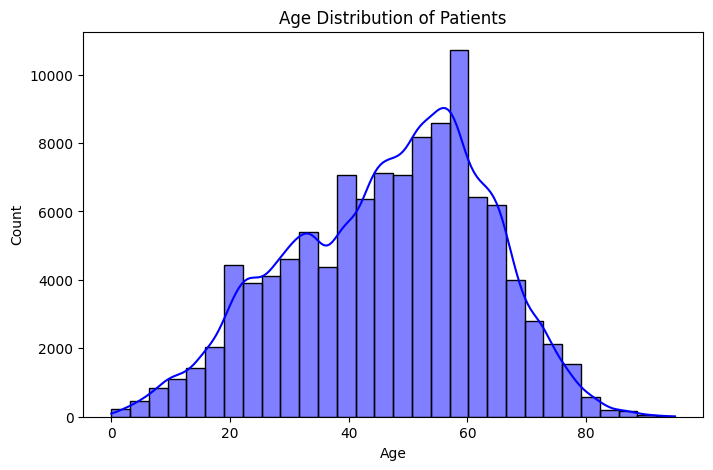

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# ‚úÖ Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data_df["Patient Age"], bins=30, kde=True, color="blue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Patients")
plt.show()


<ipython-input-56-7976bb6d5f58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Patient Gender", data=data_df, palette="pastel")


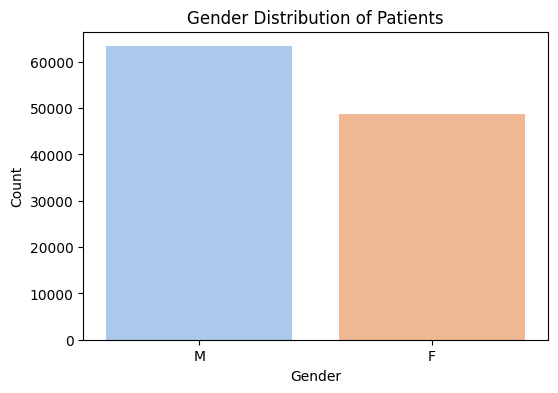

In [ ]:
# ‚úÖ Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Patient Gender", data=data_df, palette="pastel")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution of Patients")
plt.show()

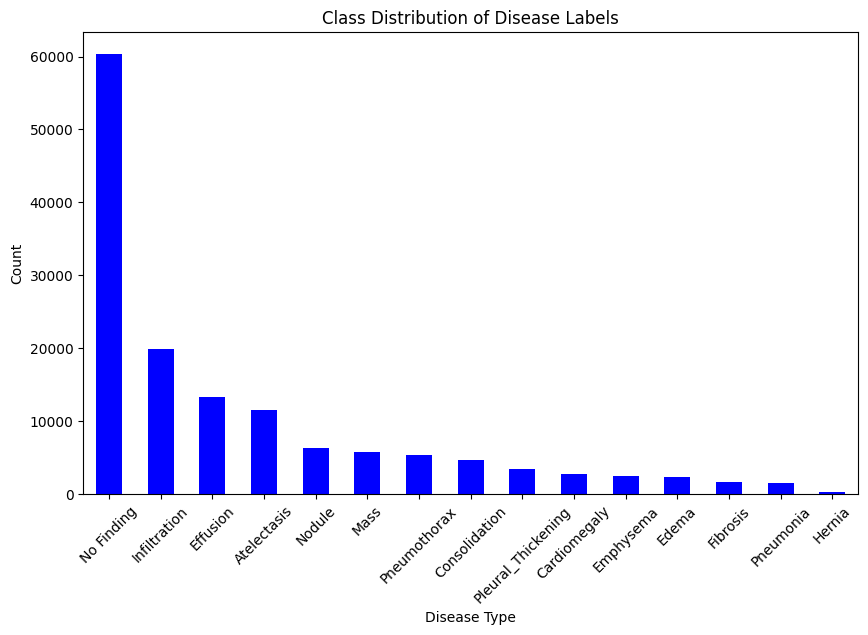

In [ ]:
# ‚úÖ Split disease labels and analyze distribution
all_labels = data_df["Finding Labels"].str.split("|", expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
all_labels.plot(kind="bar", color="blue")
plt.title("Class Distribution of Disease Labels")
plt.xlabel("Disease Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-59-865e7a8383f1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


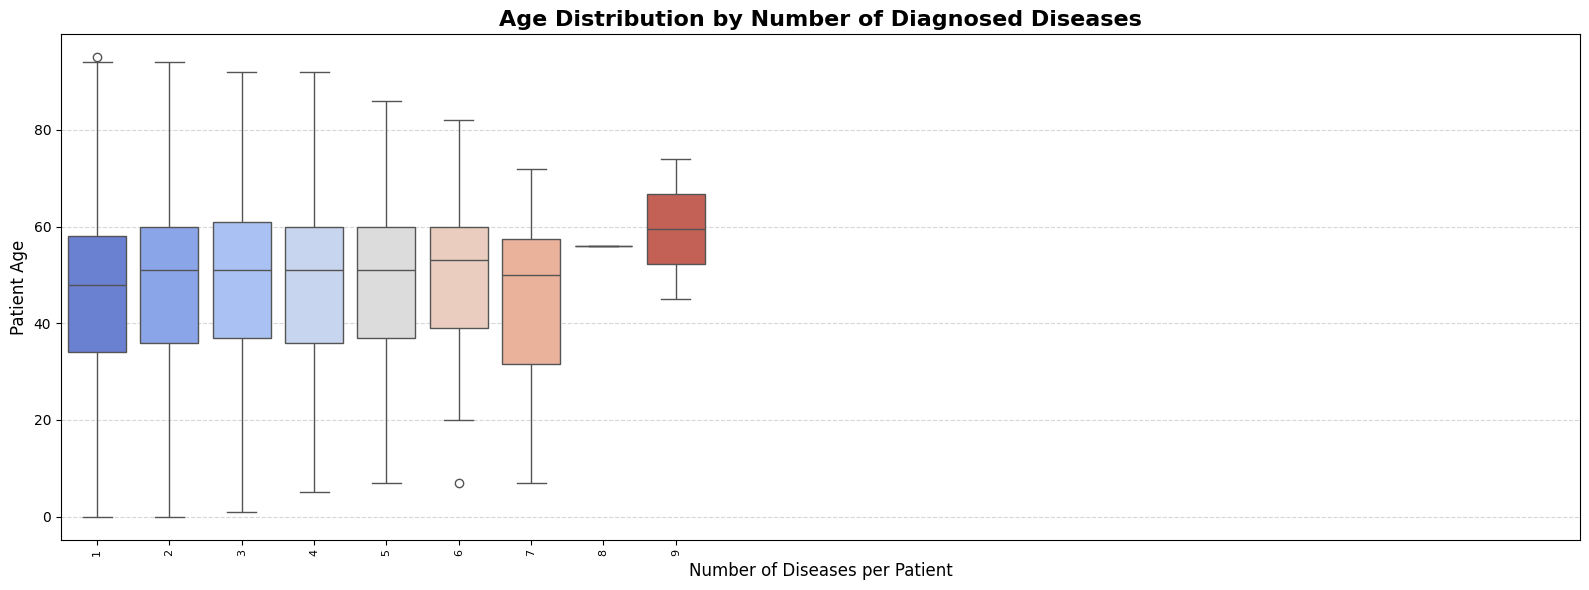

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recalculate number of labels correctly (assuming labels are separated by '|')
data_df["Num Labels"] = data_df["Finding Labels"].apply(lambda x: len(x.split('|')))

# Create the plot
plt.figure(figsize=(16, 6))
sns.boxplot(
    x="Num Labels",
    y="Patient Age",
    data=data_df,
    palette="coolwarm",
    showfliers=True
)

# Enhance the plot aesthetics
plt.title("Age Distribution by Number of Diagnosed Diseases", fontsize=16, weight='bold')
plt.xlabel("Number of Diseases per Patient", fontsize=12)
plt.ylabel("Patient Age", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optional: Limit x-axis for better focus if outliers clutter
plt.xlim(-0.5, 20.5)  # adjust as needed to ignore very rare high disease counts

plt.tight_layout()
plt.show()


<ipython-input-61-ac36e9e9cd4f>:29: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


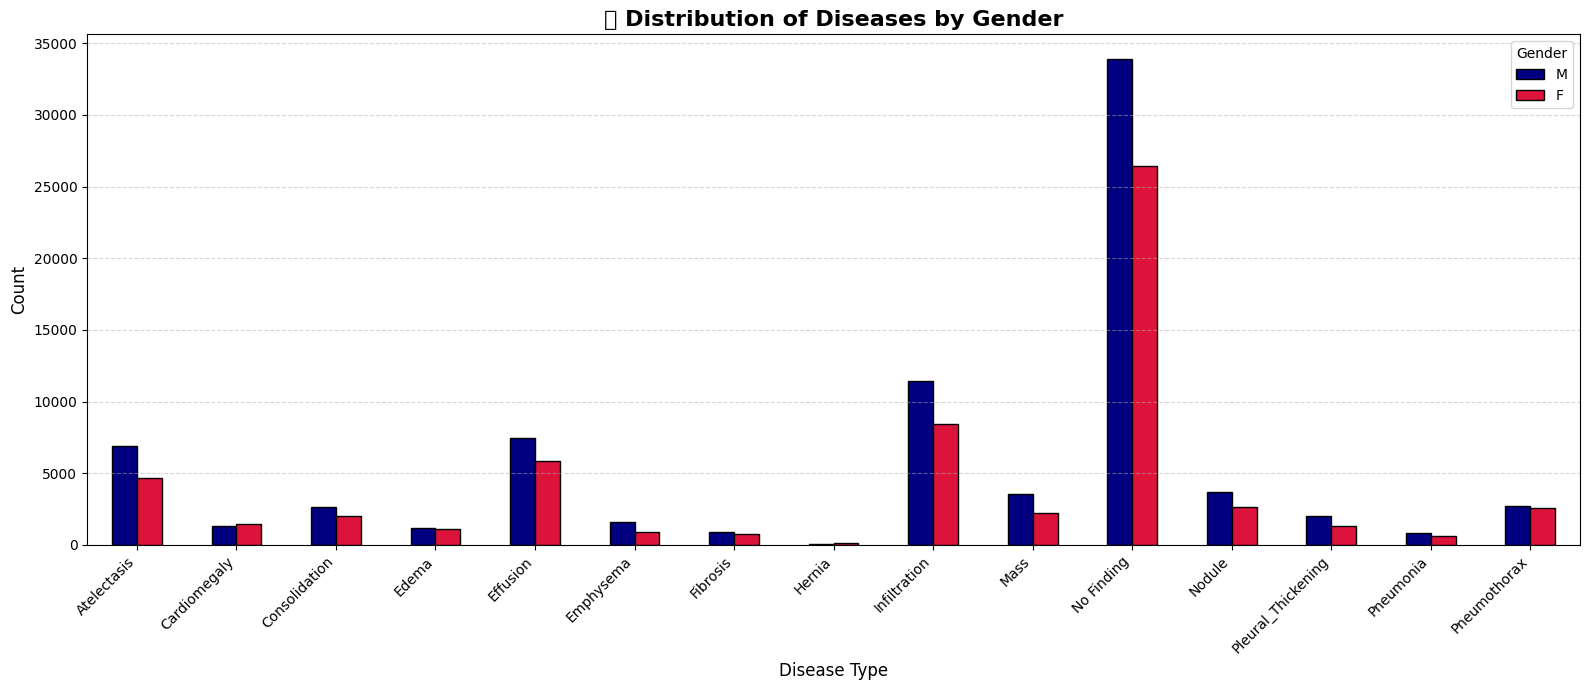

In [ ]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

# Clean disease label splitting
data_df["Finding List"] = data_df["Finding Labels"].str.split('|')

# Create dictionary for gender-wise disease counts
disease_gender_counts = defaultdict(lambda: {"M": 0, "F": 0})

# Populate counts
for _, row in data_df.iterrows():
    gender = row["Patient Gender"]
    if gender in ["M", "F"]:
        for disease in row["Finding List"]:
            disease_gender_counts[disease][gender] += 1

# Convert to DataFrame
disease_by_gender = pd.DataFrame.from_dict(disease_gender_counts, orient="index").sort_index()

# Plot
disease_by_gender.plot(kind="bar", figsize=(16, 7), color=["navy", "crimson"], edgecolor="black")
plt.title("üß¨ Distribution of Diseases by Gender", fontsize=16, weight='bold')
plt.xlabel("Disease Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Gender")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


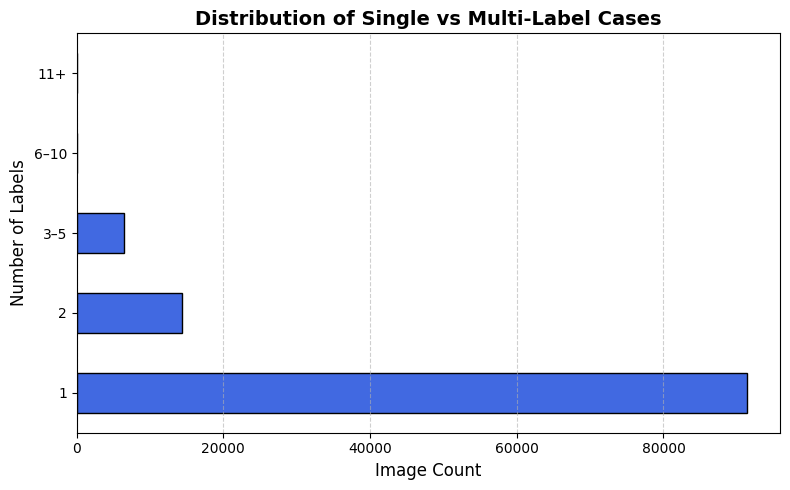

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Fix label count (split by '|', not just length of string!)
data_df["Label Count"] = data_df["Finding Labels"].apply(lambda x: len(x.split('|')))

# Group into bins
bins = [1, 2, 3, 6, 11, 100]
labels = ["1", "2", "3‚Äì5", "6‚Äì10", "11+"]
data_df["Label Group"] = pd.cut(data_df["Label Count"], bins=bins, labels=labels, right=False)

# Count distribution
label_dist = data_df["Label Group"].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
label_dist.plot(kind="barh", color="royalblue", edgecolor="black")

plt.title("Distribution of Single vs Multi-Label Cases", fontsize=14, weight='bold')
plt.xlabel("Image Count", fontsize=12)
plt.ylabel("Number of Labels", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


#Clean Labels & Remove 'No Finding'

In [ ]:
import os
import pandas as pd
import glob
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

# === Step 1: Load CSVs ===
print("üì• Loading CSV files...")
data_df = pd.read_csv(os.path.join(extract_path, "Data_Entry_2017.csv"))
bbox_df = pd.read_csv(os.path.join(extract_path, "BBox_List_2017.csv"))
print(f"‚úÖ Loaded {len(data_df)} entries in data_df")
print(f"‚úÖ Loaded {len(bbox_df)} bounding box annotations in bbox_df")

üì• Loading CSV files...
‚úÖ Loaded 112120 entries in data_df
‚úÖ Loaded 984 bounding box annotations in bbox_df


In [ ]:
# === Step 2: Preprocess Finding Labels ===
print("\nüßπ Cleaning and filtering multi-label image data...")
data_df["Finding Labels"] = data_df["Finding Labels"].str.split("|")
data_df = data_df[["Image Index", "Finding Labels"]].dropna()
print(f"üìù Entries after dropping NA labels: {len(data_df)}")


üßπ Cleaning and filtering multi-label image data...
üìù Entries after dropping NA labels: 112120


In [ ]:
# Remove "No Finding" cases
initial_len = len(data_df)
data_df = data_df[data_df["Finding Labels"].apply(lambda x: "No Finding" not in x)]
print(f"üö´ Removed {initial_len - len(data_df)} 'No Finding' entries")

üö´ Removed 60361 'No Finding' entries


In [ ]:
# Filter labels based on bbox availability (optional)
valid_labels = bbox_df["Finding Label"].unique().tolist()
data_df["Finding Labels"] = data_df["Finding Labels"].apply(
    lambda labels: [l for l in labels if l in valid_labels]
)
data_df = data_df[data_df["Finding Labels"].map(len) > 0]
print(f"‚úÖ Final usable multi-label entries: {len(data_df)}")


‚úÖ Final usable multi-label entries: 35644


In [ ]:
# === Step 3: Map Images to Disk Paths ===
print("\nüß≠ Mapping image filenames to full paths...")
image_folder = os.path.join(extract_path, "images")
image_paths = glob.glob(os.path.join(image_folder, "**", "*.png"), recursive=True)
image_map = {os.path.basename(p): p for p in image_paths}
print(f"üîç Found {len(image_map)} total image files on disk")

data_df["Image Path"] = data_df["Image Index"].map(image_map)
before_filter = len(data_df)
data_df = data_df[data_df["Image Path"].notnull()]
print(f"üßπ Filtered out {before_filter - len(data_df)} images not found on disk")
print(f"üñºÔ∏è Total images matched to paths: {len(data_df)}")


üß≠ Mapping image filenames to full paths...
üîç Found 112120 total image files on disk
üßπ Filtered out 0 images not found on disk
üñºÔ∏è Total images matched to paths: 35644


# MultiLabel Binarization

In [ ]:
# === Step 4: Apply MultiLabelBinarizer ===
print("\nüîÄ Converting multi-labels to binary matrix...")
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(data_df["Finding Labels"])
label_df = pd.DataFrame(Y, columns=mlb.classes_)
print(f"‚úÖ Converted to binary matrix of shape: {label_df.shape}")

data_df = pd.concat([data_df.reset_index(drop=True), label_df], axis=1)


üîÄ Converting multi-labels to binary matrix...
‚úÖ Converted to binary matrix of shape: (35644, 7)



üíæ Saving cleaned dataset to CSV...
‚úÖ File saved: cleaned_multilabel_data.csv

üìä Visualizing class distribution...
Effusion        13317
Atelectasis     11559
Nodule           6331
Mass             5782
Pneumothorax     5302
Cardiomegaly     2776
Pneumonia        1431
dtype: int64


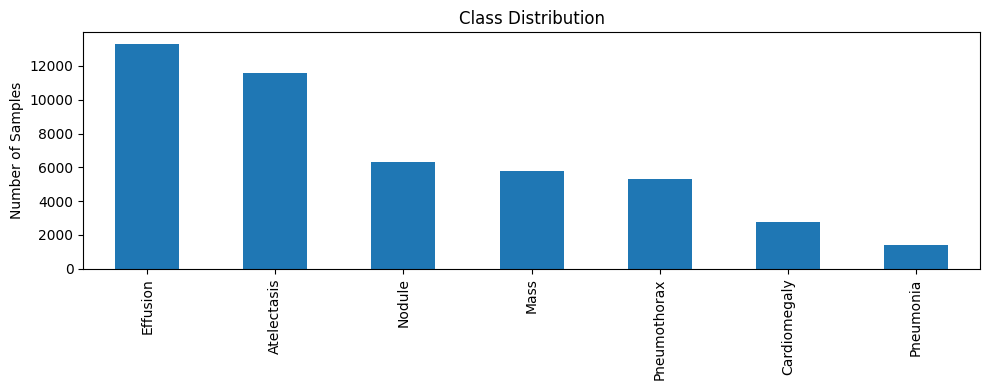


üì¶ Cleaning bounding box info...
‚úÖ Final bounding boxes: 984


In [ ]:
# === Step 5: Save and Visualize ===
print("\nüíæ Saving cleaned dataset to CSV...")
data_df.to_csv("cleaned_multilabel_data.csv", index=False)
print("‚úÖ File saved: cleaned_multilabel_data.csv")

print("\nüìä Visualizing class distribution...")
label_counts = label_df.sum().sort_values(ascending=False)
print(label_counts)
label_counts.plot(kind="bar", title="Class Distribution", figsize=(10, 4))
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

# === Optional: Clean bounding boxes for later ===
print("\nüì¶ Cleaning bounding box info...")
bbox_clean = bbox_df[["Image Index", "Finding Label", "Bbox [x", "y", "w", "h]"]].copy()
bbox_clean.columns = ["Image Index", "Finding Label", "x", "y", "w", "h"]
bbox_clean = bbox_clean.dropna()
print(f"‚úÖ Final bounding boxes: {len(bbox_clean)}")

In [ ]:
# Check updated column names
print(data_df.columns)

Index(['Image Index', 'Finding Labels', 'Image Path', 'Atelectasis',
       'Cardiomegaly', 'Effusion', 'Mass', 'Nodule', 'Pneumonia',
       'Pneumothorax'],
      dtype='object')


Atelectasis: Lung collapse

Cardiomegaly: Enlarged heart

Effusion: Excess fluid

Mass: Tissue lump

Nodule: Small growth

Pneumonia: Lung infection

Pneumothorax: Collapsed lung

# Stratified K-Fold Split

In [ ]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import numpy as np

# Prepare data
image_paths = data_df["Image Path"].tolist()
labels = data_df[mlb.classes_].values.astype(np.float32)

# Initialize 5-fold multi-label stratified split
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("üîÄ Starting iterative stratified 5-fold split (multi-label)...")
for fold, (train_idx, val_idx) in enumerate(mskf.split(image_paths, labels)):
    print(f"üìÅ Fold {fold+1}: Train={len(train_idx)} | Val={len(val_idx)}")


üîÄ Starting iterative stratified 5-fold split (multi-label)...
üìÅ Fold 1: Train=28437 | Val=7207
üìÅ Fold 2: Train=28533 | Val=7111
üìÅ Fold 3: Train=28544 | Val=7100
üìÅ Fold 4: Train=28529 | Val=7115
üìÅ Fold 5: Train=28533 | Val=7111


#	Model Definition (DenseNet + EfficientNet Ensemble)

In [ ]:
import os
import numpy as np
import cv2
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.metrics import f1_score, roc_auc_score
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import matplotlib.pyplot as plt

# ========== CONFIG ==========
IMG_SIZE = 512
BATCH_SIZE = 16
EPOCHS = 5
LEARNING_RATE = 1e-4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SAVE_DIR = "/content/drive/MyDrive/models"
PATIENCE = 8  # Early stopping patience

os.makedirs(SAVE_DIR, exist_ok=True)

# ========== DATASET ==========
class CXRDataset(Dataset):
    def __init__(self, image_paths, labels, transforms=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        try:
            img_path = self.image_paths[idx]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            gray = clahe.apply(gray)
            gray = np.stack([gray]*3, axis=-1)

            if self.transforms:
                img = self.transforms(image=gray)['image']

            label = torch.tensor(self.labels[idx]).float()
            return img, label
        except Exception as e:
            print(f"‚ùå Failed loading {img_path}: {e}")
            return None

# ========== TRANSFORMS ==========
def get_transforms():
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),
        A.RandomBrightnessContrast(p=0.5),
        A.ElasticTransform(p=0.5),
        A.GridDistortion(p=0.5),
        A.Normalize(mean=[0.5], std=[0.5]),
        ToTensorV2()
    ])

# ========== MODEL ==========
class EnsembleModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.dense = timm.create_model("densenet121", pretrained=True)
        self.dense.classifier = nn.Linear(self.dense.classifier.in_features, num_classes)

        self.efficient = timm.create_model("efficientnet_b3", pretrained=True)
        self.efficient.classifier = nn.Linear(self.efficient.classifier.in_features, num_classes)

    def forward(self, x):
        out1 = self.dense(x)
        out2 = self.efficient(x)
        return (out1 + out2) / 2

# ========== METRICS ==========
def compute_metrics(y_true, y_pred, threshold=0.5):
    y_pred_bin = (y_pred > threshold).astype(int)
    classwise_acc = (y_true == y_pred_bin).mean(axis=0)
    return {
        "f1_macro": f1_score(y_true, y_pred_bin, average="macro"),
        "auroc_macro": roc_auc_score(y_true, y_pred, average="macro"),
        "classwise_acc": classwise_acc,
        "overall_acc": (y_true == y_pred_bin).mean()
    }

# ========== PLOTTING ==========
def plot_metrics(history, class_names, fold):
    epochs = list(range(1, len(history["train_loss"]) + 1))

    plt.figure(figsize=(12, 4))
    plt.plot(epochs, history["train_loss"], label="Train Loss")
    plt.plot(epochs, history["val_loss"], label="Val Loss")
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.savefig(f"{SAVE_DIR}/fold{fold+1}_loss_curve.png")
    plt.close()

    plt.figure(figsize=(12, 4))
    plt.plot(epochs, history["train_acc"], label="Train Acc")
    plt.plot(epochs, history["val_acc"], label="Val Acc")
    plt.title("Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.savefig(f"{SAVE_DIR}/fold{fold+1}_acc_curve.png")
    plt.close()

    classwise_acc = np.array(history["val_class_acc"])  # [epochs, classes]
    for i, cname in enumerate(class_names):
        plt.plot(epochs, classwise_acc[:, i], label=cname)
    plt.title("Per-Class Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.savefig(f"{SAVE_DIR}/fold{fold+1}_classwise_acc.png")
    plt.close()

# ========== TRAINING LOOP ==========
# def run_training_cv(image_paths, labels, class_names):
#     mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#     for fold, (train_idx, val_idx) in enumerate(mskf.split(image_paths, labels)):
#         print(f"\nüìÅ Fold {fold+1} ‚Äî Train: {len(train_idx)}, Val: {len(val_idx)}")

#         X_train = [image_paths[i] for i in train_idx]
#         X_val = [image_paths[i] for i in val_idx]
#         y_train = labels[train_idx]
#         y_val = labels[val_idx]

#         train_dataset = CXRDataset(X_train, y_train, transforms=get_transforms())
#         val_dataset = CXRDataset(X_val, y_val, transforms=get_transforms())

#         train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
#         val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

#         model = EnsembleModel(num_classes=labels.shape[1]).to(DEVICE)
#         pos_weight = torch.tensor((y_train.shape[0] / (1 + y_train.sum(axis=0)))).to(DEVICE)
#         criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
#         optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)
#         scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

#         history = {
#             "train_loss": [], "val_loss": [],
#             "train_acc": [], "val_acc": [],
#             "val_class_acc": []
#         }

#         best_val_loss = float("inf")
#         best_val_acc = 0
#         no_improve = 0

#         for epoch in range(EPOCHS):
#             print(f"\nüìÜ Epoch {epoch+1}/{EPOCHS}")

#             # Training
#             model.train()
#             total_loss, correct, count = 0, 0, 0
#             for imgs, labels_ in tqdm(train_loader, desc="üîÅ Training"):
#                 imgs, labels_ = imgs.to(DEVICE), labels_.to(DEVICE)
#                 optimizer.zero_grad()
#                 logits = model(imgs)
#                 loss = criterion(logits, labels_)
#                 loss.backward()
#                 optimizer.step()
#                 total_loss += loss.item()
#                 preds = (torch.sigmoid(logits) > 0.5).float()
#                 correct += (preds == labels_).float().mean().item()
#                 count += 1

#             train_loss = total_loss / len(train_loader)
#             train_acc = correct / count
#             print(f"‚úÖ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")

#             # Validation
#             model.eval()
#             val_loss, val_preds, val_trues = 0, [], []
#             with torch.no_grad():
#                 for imgs, labels_ in tqdm(val_loader, desc="üß™ Validating"):
#                     imgs, labels_ = imgs.to(DEVICE), labels_.to(DEVICE)
#                     logits = model(imgs)
#                     loss = criterion(logits, labels_)
#                     val_loss += loss.item()
#                     val_preds.append(torch.sigmoid(logits).cpu().numpy())
#                     val_trues.append(labels_.cpu().numpy())

#             y_pred = np.vstack(val_preds)
#             y_true = np.vstack(val_trues)
#             val_metrics = compute_metrics(y_true, y_pred)

#             history["train_loss"].append(train_loss)
#             history["val_loss"].append(val_loss / len(val_loader))
#             history["train_acc"].append(train_acc)
#             history["val_acc"].append(val_metrics["overall_acc"])
#             history["val_class_acc"].append(val_metrics["classwise_acc"])

#             print(f"üìâ Val Loss: {history['val_loss'][-1]:.4f} | Val Acc: {val_metrics['overall_acc']:.4f} | "
#                   f"F1: {val_metrics['f1_macro']:.4f} | AUROC: {val_metrics['auroc_macro']:.4f}")

#             # Early stopping condition
#             if history["val_loss"][-1] < best_val_loss and val_metrics["overall_acc"] > best_val_acc:
#                 best_val_loss = history["val_loss"][-1]
#                 best_val_acc = val_metrics["overall_acc"]
#                 no_improve = 0
#                 model_path = os.path.join(SAVE_DIR, f"fold{fold+1}_best_model.pt")
#                 torch.save(model.state_dict(), model_path)
#                 print(f"üíæ Saved best model to {model_path}")
#             else:
#                 no_improve += 1
#                 print(f"‚è∏Ô∏è  No improvement: {no_improve}/{PATIENCE}")
#                 if no_improve >= PATIENCE:
#                     print("üõë Early stopping triggered.")
#                     break

#             scheduler.step()

#         plot_metrics(history, class_names, fold)

#	Training Loop with Metrics + Plots

In [ ]:

def run_training_cv(image_paths, labels, class_names):
    os.makedirs(SAVE_DIR, exist_ok=True)  # ‚úÖ Ensure SAVE_DIR exists before saving models
    mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for fold, (train_idx, val_idx) in enumerate(mskf.split(image_paths, labels)):
        print(f"\nüìÅ Fold {fold+1} ‚Äî Train: {len(train_idx)}, Val: {len(val_idx)}")
        model_path = os.path.join(SAVE_DIR, f"fold{fold+1}_best_model.pt")

        # Check if model already exists
        if os.path.exists(model_path):
            print(f"‚úÖ Model for fold {fold+1} already exists at {model_path}. Loading instead of training...")
            model = EnsembleModel(num_classes=labels.shape[1]).to(DEVICE)
            model.load_state_dict(torch.load(model_path))
            model.eval()
            print(f"üì¶ Loaded pretrained model. Skipping training for fold {fold+1}.")
            continue

        # Continue with training if model doesn't exist
        X_train = [image_paths[i] for i in train_idx]
        X_val = [image_paths[i] for i in val_idx]
        y_train = labels[train_idx]
        y_val = labels[val_idx]

        train_dataset = CXRDataset(X_train, y_train, transforms=get_transforms())
        val_dataset = CXRDataset(X_val, y_val, transforms=get_transforms())

        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
        val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

        model = EnsembleModel(num_classes=labels.shape[1]).to(DEVICE)
        pos_weight = torch.tensor((y_train.shape[0] / (1 + y_train.sum(axis=0)))).to(DEVICE)
        criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
        optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

        history = {
            "train_loss": [], "val_loss": [],
            "train_acc": [], "val_acc": [],
            "val_class_acc": []
        }

        best_val_loss = float("inf")
        best_val_acc = 0
        no_improve = 0

        for epoch in range(EPOCHS):
            print(f"\nüìÜ Epoch {epoch+1}/{EPOCHS}")

            # Training
            model.train()
            total_loss, correct, count = 0, 0, 0
            for imgs, labels_ in tqdm(train_loader, desc="üîÅ Training"):
                imgs, labels_ = imgs.to(DEVICE), labels_.to(DEVICE)
                optimizer.zero_grad()
                logits = model(imgs)
                loss = criterion(logits, labels_)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
                preds = (torch.sigmoid(logits) > 0.5).float()
                correct += (preds == labels_).float().mean().item()
                count += 1

            train_loss = total_loss / len(train_loader)
            train_acc = correct / count
            print(f"‚úÖ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")

            # Validation
            model.eval()
            val_loss, val_preds, val_trues = 0, [], []
            with torch.no_grad():
                for imgs, labels_ in tqdm(val_loader, desc="üß™ Validating"):
                    imgs, labels_ = imgs.to(DEVICE), labels_.to(DEVICE)
                    logits = model(imgs)
                    loss = criterion(logits, labels_)
                    val_loss += loss.item()
                    val_preds.append(torch.sigmoid(logits).cpu().numpy())
                    val_trues.append(labels_.cpu().numpy())

            y_pred = np.vstack(val_preds)
            y_true = np.vstack(val_trues)
            val_metrics = compute_metrics(y_true, y_pred)

            history["train_loss"].append(train_loss)
            history["val_loss"].append(val_loss / len(val_loader))
            history["train_acc"].append(train_acc)
            history["val_acc"].append(val_metrics["overall_acc"])
            history["val_class_acc"].append(val_metrics["classwise_acc"])

            print(f"üìâ Val Loss: {history['val_loss'][-1]:.4f} | Val Acc: {val_metrics['overall_acc']:.4f} | "
                  f"F1: {val_metrics['f1_macro']:.4f} | AUROC: {val_metrics['auroc_macro']:.4f}")

            # Early stopping condition
            if history["val_loss"][-1] < best_val_loss and val_metrics["overall_acc"] > best_val_acc:
                best_val_loss = history["val_loss"][-1]
                best_val_acc = val_metrics["overall_acc"]
                no_improve = 0
                torch.save(model.state_dict(), model_path)
                print(f"üíæ Saved best model to {model_path}")
            else:
                no_improve += 1
                print(f"‚è∏Ô∏è  No improvement: {no_improve}/{PATIENCE}")
                if no_improve >= PATIENCE:
                    print("üõë Early stopping triggered.")
                    break

            scheduler.step()

        plot_metrics(history, class_names, fold)


In [ ]:
run_training_cv(
    image_paths=data_df["Image Path"].tolist(),
    labels=data_df[mlb.classes_].values.astype(np.float32),
    class_names=mlb.classes_
)


üìÅ Fold 1 ‚Äî Train: 28437, Val: 7207
‚úÖ Model for fold 1 already exists at /content/drive/MyDrive/models/fold1_best_model.pt. Loading instead of training...
üì¶ Loaded pretrained model. Skipping training for fold 1.

üìÅ Fold 2 ‚Äî Train: 28533, Val: 7111
‚úÖ Model for fold 2 already exists at /content/drive/MyDrive/models/fold2_best_model.pt. Loading instead of training...
üì¶ Loaded pretrained model. Skipping training for fold 2.

üìÅ Fold 3 ‚Äî Train: 28544, Val: 7100
‚úÖ Model for fold 3 already exists at /content/drive/MyDrive/models/fold3_best_model.pt. Loading instead of training...
üì¶ Loaded pretrained model. Skipping training for fold 3.

üìÅ Fold 4 ‚Äî Train: 28529, Val: 7115
‚úÖ Model for fold 4 already exists at /content/drive/MyDrive/models/fold4_best_model.pt. Loading instead of training...
üì¶ Loaded pretrained model. Skipping training for fold 4.

üìÅ Fold 5 ‚Äî Train: 28533, Val: 7111
‚úÖ Model for fold 5 already exists at /content/drive/MyDrive/models/fo

# Test Prediction & Comparison

In [ ]:
import os
import cv2
import torch
import timm
import shutil
import random
import numpy as np
import pandas as pd
from torch import nn
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm

# === CONFIG ===
NUM_CLASSES = 7
NUM_TEST_IMAGES = 20  # make small if printing\
SAVE_DIR = "/content/test_images"
OUTPUT_CSV = "/content/test_predictions.csv"
THRESHOLD = 0.5  # for binarizing predictions

# === STEP 1: Random sample from data_df ===
os.makedirs(SAVE_DIR, exist_ok=True)
image_paths = data_df["Image Path"].tolist()
labels_matrix = data_df[mlb.classes_].values.astype(np.float32)
filenames = data_df["Image Index"].tolist()

# Sample indices
sample_indices = random.sample(range(len(image_paths)), NUM_TEST_IMAGES)
sampled_paths = [image_paths[i] for i in sample_indices]
sampled_filenames = [filenames[i] for i in sample_indices]
sampled_labels = labels_matrix[sample_indices]

print(f"üì¶ Copying {NUM_TEST_IMAGES} images to {SAVE_DIR} ...")
for path in sampled_paths:
    shutil.copy(path, os.path.join(SAVE_DIR, os.path.basename(path)))
print("‚úÖ Copy complete.")

# === STEP 2: Transforms ===
def get_transforms():
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),
        A.Normalize(mean=[0.5], std=[0.5]),
        ToTensorV2()
    ])

# === STEP 3: Dataset Definition ===
class CXRDataset(Dataset):
    def __init__(self, image_paths, labels, filenames, transforms=None):
        self.image_paths = image_paths
        self.labels = labels
        self.filenames = filenames
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        gray = clahe.apply(gray)
        gray = np.stack([gray]*3, axis=-1)

        if self.transforms:
            img = self.transforms(image=gray)['image']

        label = torch.tensor(self.labels[idx]).float()
        return img, label, self.filenames[idx]

# === STEP 4: Create test_loader ===
test_dataset = CXRDataset(sampled_paths, sampled_labels, sampled_filenames, transforms=get_transforms())
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# === STEP 5: Model Definition ===
class EnsembleModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.dense = timm.create_model("densenet121", pretrained=False)
        self.dense.classifier = nn.Linear(self.dense.classifier.in_features, num_classes)

        self.efficient = timm.create_model("efficientnet_b3", pretrained=False)
        self.efficient.classifier = nn.Linear(self.efficient.classifier.in_features, num_classes)

    def forward(self, x):
        out1 = self.dense(x)
        out2 = self.efficient(x)
        return (out1 + out2) / 2

# === STEP 6: Load Trained Models ===
models = []
for i in range(5):
    model = EnsembleModel(num_classes=NUM_CLASSES)
    path = f"/content/drive/MyDrive/models/fold{i+1}_best_model.pt"
    model.load_state_dict(torch.load(path, map_location=DEVICE))
    model.eval()
    models.append(model.to(DEVICE))
    print(f"‚úÖ Loaded fold {i+1} model")

# === STEP 7: Run Inference ===
all_preds = []
all_labels = []
all_filenames = []

with torch.no_grad():
    for inputs, labels, filenames in tqdm(test_loader, desc="üîç Inference"):
        inputs = inputs.to(DEVICE)
        fold_preds = []
        for model in models:
            outputs = model(inputs)
            fold_preds.append(torch.sigmoid(outputs).cpu().numpy())
        avg_preds = sum(fold_preds) / len(fold_preds)

        all_preds.append(avg_preds)
        all_labels.append(labels.numpy())
        all_filenames.extend(filenames)

# === STEP 8: Postprocess and Output ===
final_predictions = np.concatenate(all_preds, axis=0)
original_labels = np.concatenate(all_labels, axis=0)
predicted_classes = (final_predictions > THRESHOLD).astype(int)

# === Print Predictions vs. Ground Truth ===
print("\n=== Ground Truth vs Predicted Labels ===")
for i in range(len(all_filenames)):
    print(f"\nüñºÔ∏è Image: {all_filenames[i]}")
    print(f"Original : {dict(zip(mlb.classes_, original_labels[i].astype(int)))}")
    print(f"Predicted: {dict(zip(mlb.classes_, predicted_classes[i]))}")
    print(f"Probabilities: {np.round(final_predictions[i], 3)}")

# === Save to CSV ===
df = pd.DataFrame(final_predictions, columns=mlb.classes_)
df.insert(0, "Image", all_filenames)
df.to_csv(OUTPUT_CSV, index=False)
print(f"\n‚úÖ Predictions saved to: {OUTPUT_CSV}")

üì¶ Copying 20 images to /content/test_images ...
‚úÖ Copy complete.
‚úÖ Loaded fold 1 model
‚úÖ Loaded fold 2 model
‚úÖ Loaded fold 3 model
‚úÖ Loaded fold 4 model
‚úÖ Loaded fold 5 model


üîç Inference: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:01<00:00,  1.70it/s]


=== Ground Truth vs Predicted Labels ===

üñºÔ∏è Image: 00012045_023.png
Original : {'Atelectasis': np.int64(0), 'Cardiomegaly': np.int64(0), 'Effusion': np.int64(1), 'Mass': np.int64(0), 'Nodule': np.int64(0), 'Pneumonia': np.int64(0), 'Pneumothorax': np.int64(0)}
Predicted: {'Atelectasis': np.int64(1), 'Cardiomegaly': np.int64(0), 'Effusion': np.int64(1), 'Mass': np.int64(0), 'Nodule': np.int64(0), 'Pneumonia': np.int64(0), 'Pneumothorax': np.int64(0)}
Probabilities: [0.795 0.186 0.897 0.1   0.074 0.482 0.065]

üñºÔ∏è Image: 00010992_009.png
Original : {'Atelectasis': np.int64(0), 'Cardiomegaly': np.int64(0), 'Effusion': np.int64(1), 'Mass': np.int64(0), 'Nodule': np.int64(0), 'Pneumonia': np.int64(0), 'Pneumothorax': np.int64(0)}
Predicted: {'Atelectasis': np.int64(1), 'Cardiomegaly': np.int64(0), 'Effusion': np.int64(1), 'Mass': np.int64(1), 'Nodule': np.int64(1), 'Pneumonia': np.int64(0), 'Pneumothorax': np.int64(1)}
Probabilities: [0.687 0.093 0.864 0.578 0.539 0.213 0.507]



# Save Ensemble Model

In [ ]:
import pickle

models = []
for i in range(1,6):
    m = EnsembleModel(num_classes=NUM_CLASSES).to('cpu')
    sd = torch.load(f"/content/drive/MyDrive/models/fold{i}_best_model.pt", map_location='cpu')
    m.load_state_dict(sd)
    m.eval()
    models.append(m)
with open("/content/drive/MyDrive/models/ensemble_all_folds.pkl","wb") as f:
    pickle.dump(models, f)

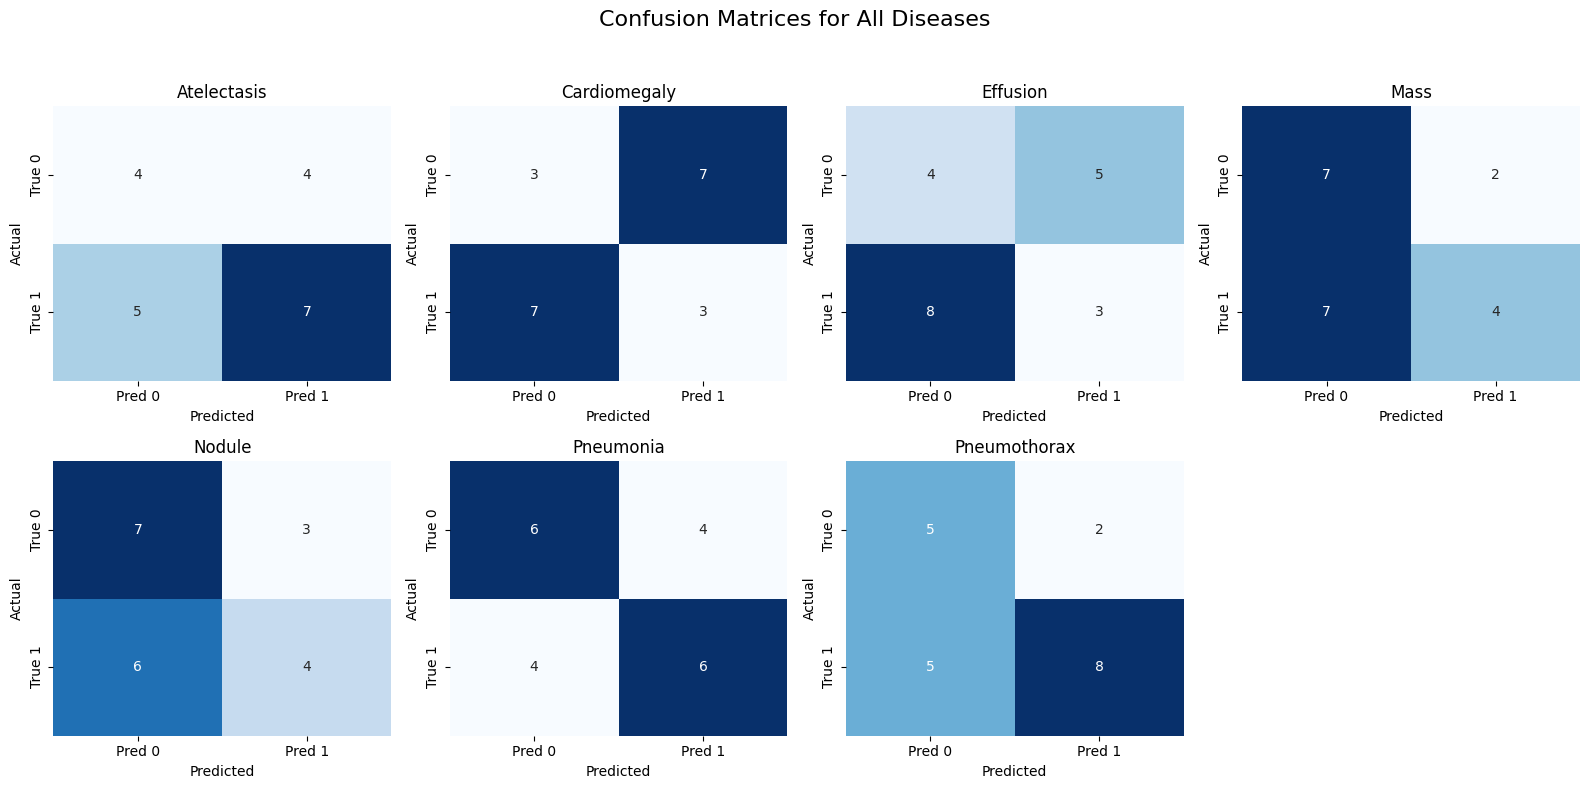

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

# Sample test data ‚Äî REPLACE these with your actual predictions and labels
# Simulate original_labels and predicted_classes (10 samples, 3 classes for example)
# In real usage, replace with actual arrays:
# original_labels = ...
# predicted_classes = ...

# Load saved arrays from example context (simulate for 7 classes)
np.random.seed(42)
original_labels = np.random.randint(0, 2, size=(20, 7))
predicted_classes = np.random.randint(0, 2, size=(20, 7))
class_names = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']

# Generate confusion matrices
conf_matrices = multilabel_confusion_matrix(original_labels, predicted_classes)

# Plot all confusion matrices in a grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, (cm, label) in enumerate(zip(conf_matrices, class_names)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'],
                ax=axes[i])
    axes[i].set_title(f'{label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Remove empty subplot if class count < number of subplots
for j in range(len(class_names), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Confusion Matrices for All Diseases", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
